<a href="https://colab.research.google.com/github/anirudhkowluri/decision-tree/blob/main/Decision_tress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('/content/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.drop(['Name','Ticket','Parch','SibSp','Cabin','Embarked'],axis = 1, inplace= True)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [58]:
df.Sex = df.Sex.map({'male': 1,'female': 0})
df.Sex.astype(int)

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [59]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,1,22.0,7.2500
1,2,1,1,0,38.0,71.2833
2,3,1,3,0,26.0,7.9250
3,4,1,1,0,35.0,53.1000
4,5,0,3,1,35.0,8.0500


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [61]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


In [62]:
df.Age =df.Age.fillna(df.Age.mean())

In [63]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [65]:
input = df.drop(['Survived'],axis = 1)
target = df['Survived']

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size = 0.3)

In [67]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
model.score(x_test,y_test)

0.7574626865671642

[Text(0.2995876736111111, 0.96875, 'x[2] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.14743589743589744, 0.90625, 'x[1] <= 2.5\ngini = 0.402\nsamples = 215\nvalue = [60, 155]'),
 Text(0.22351178552350426, 0.9375, 'True  '),
 Text(0.038461538461538464, 0.84375, 'x[3] <= 3.0\ngini = 0.096\nsamples = 119\nvalue = [6, 113]'),
 Text(0.021367521367521368, 0.78125, 'x[0] <= 414.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01282051282051282, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.029914529914529916, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05555555555555555, 0.78125, 'x[4] <= 26.125\ngini = 0.082\nsamples = 117\nvalue = [5, 112]'),
 Text(0.04700854700854701, 0.71875, 'x[3] <= 56.0\ngini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.038461538461538464, 0.65625, 'x[0] <= 48.0\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.017094017094017096, 0.59375, 'x[3] <= 41.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Tex

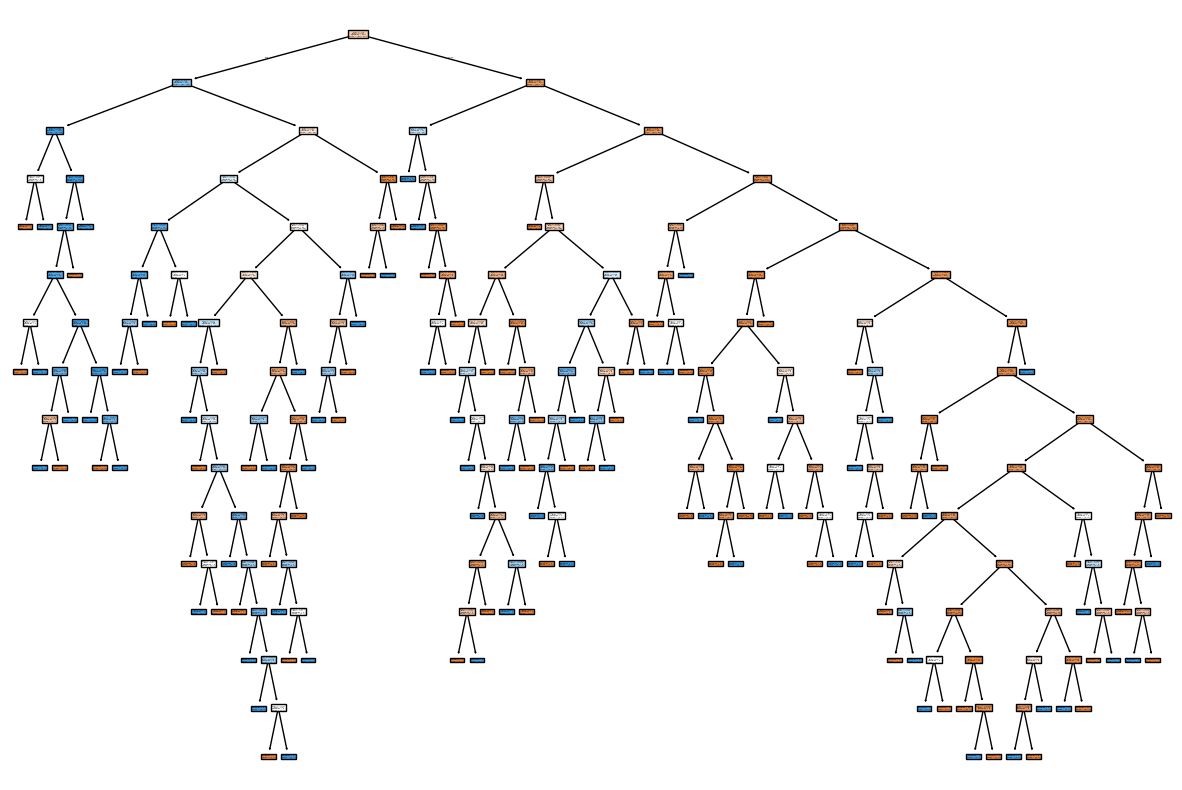

In [69]:
plt.figure(figsize = (15,10))
tree.plot_tree(model,filled = True)

In [70]:
#model cost complexity pruning is used to avoid overfiting the parameters used are ccp_alphas#
path = model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [72]:
ccp_alphas

array([0.        , 0.00098092, 0.00107009, 0.00114653, 0.00133761,
       0.00135819, 0.00149813, 0.00151596, 0.0015287 , 0.00154569,
       0.00155498, 0.00155555, 0.00160514, 0.00160514, 0.00160514,
       0.00160514, 0.00171269, 0.00176565, 0.00178348, 0.00187266,
       0.00192616, 0.00198282, 0.00201689, 0.00214018, 0.00222936,
       0.00229154, 0.00230834, 0.00233474, 0.0024077 , 0.0024077 ,
       0.00241668, 0.00244592, 0.00245229, 0.00248137, 0.00256822,
       0.00295294, 0.00300963, 0.00361024, 0.00421938, 0.00452805,
       0.00899174, 0.01069768, 0.01311702, 0.01532404, 0.04472981,
       0.12921144])

In [84]:
# for each value of ccp_alpha,train a decision model store the model#
from sklearn.tree import DecisionTreeClassifier
models = []
for ccp_alpha in ccp_alphas:
  model = DecisionTreeClassifier(random_state = 0,ccp_alpha = ccp_alpha)
  model.fit(x_train,y_train)
  models.append(model)

print("number of nodes in last tree is: {} with ccp_alpha: {}" .format(models[-1].tree_.node_count ,ccp_alphas[-1]))

number of nodes in last tree is: 3 with ccp_alpha: 0.1292114394810634


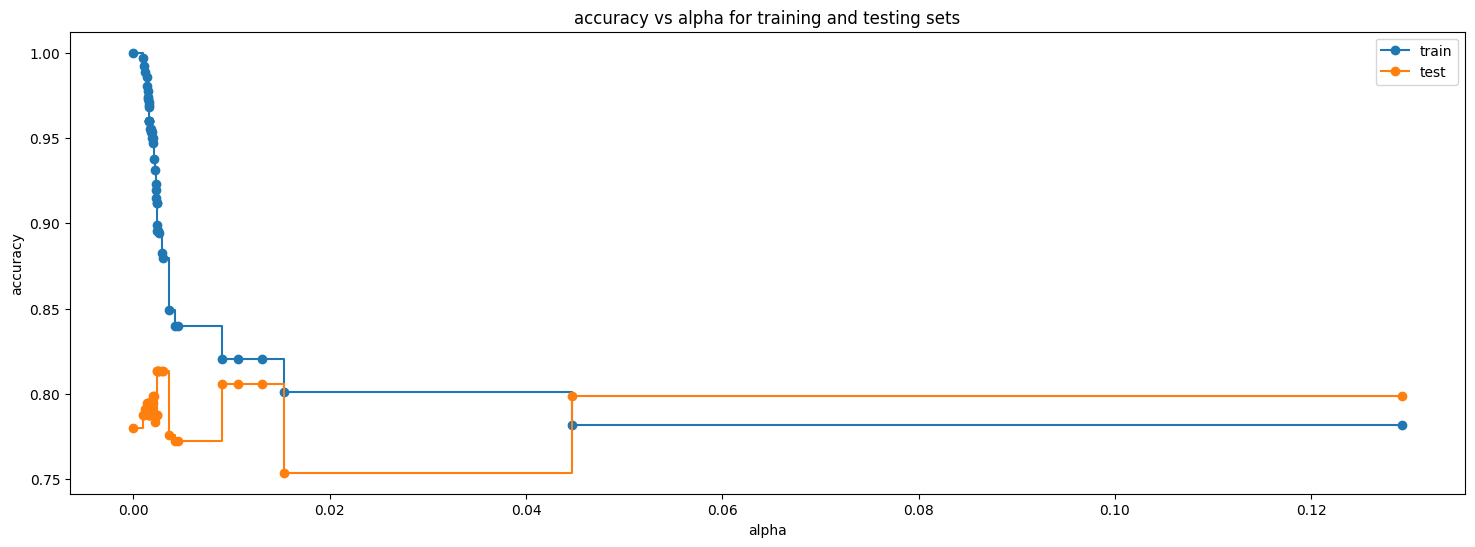

In [86]:
#calculate train and test accuracy of all models #
train_scores = [model.score(x_train,y_train) for model in models]
test_scores = [model.score(x_test,y_test) for model in models]
#plot training and testing accuracy#
fig ,ax = plt.subplots(figsize =(18,6))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores,marker = 'o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores,marker = 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [91]:
# at 0.02 the ccp_alpha is obtained#
model = DecisionTreeClassifier(random_state = 0,ccp_alpha = 0.03)
model.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)

In [92]:
from sklearn.metrics import accuracy_score
model_predict = model.predict(x_test)
print("accuracy score",accuracy_score(y_test,model_predict))

accuracy score 0.753731343283582


In [ ]:
#decision trees part 2#

In [ ]:
#to prevent overfitting we use post pruning by cost complexity pruning(ccp) which uses parameters like min_samples_leaf,max_depth#

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [94]:
from sklearn.datasets import load_breast_cancer
x,y = load_breast_cancer(return_X_y = True)

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [96]:

model2 = tree.DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
from sklearn.metrics import accuracy_score
model2_predict = model2.predict(x_test)
accuracy_score(y_test,model2_predict)

0.9298245614035088

In [104]:
#model cost complexity pruning is used to avoid overfiting the parameters used are ccp_alphas#
path = model2.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [105]:
ccp_alphas

array([0.        , 0.0025006 , 0.00376884, 0.00376884, 0.0045683 ,
       0.00492257, 0.00548656, 0.00702815, 0.00719507, 0.00951477,
       0.02652826, 0.03251861, 0.35416562])

In [111]:
# for each value of ccp_alpha,train a decision model store the model#
from sklearn.tree import DecisionTreeClassifier
models = []
for ccp_alpha in ccp_alphas:
  model = DecisionTreeClassifier(random_state = 0,ccp_alpha = ccp_alpha)
  model.fit(x_train,y_train)
  models.append(model)

print("number of nodes in last tree is: {} with ccp_alpha: {}" .format(models[-1].tree_.node_count ,ccp_alphas[-1]))

number of nodes in last tree is: 1 with ccp_alpha: 0.35416561747689324


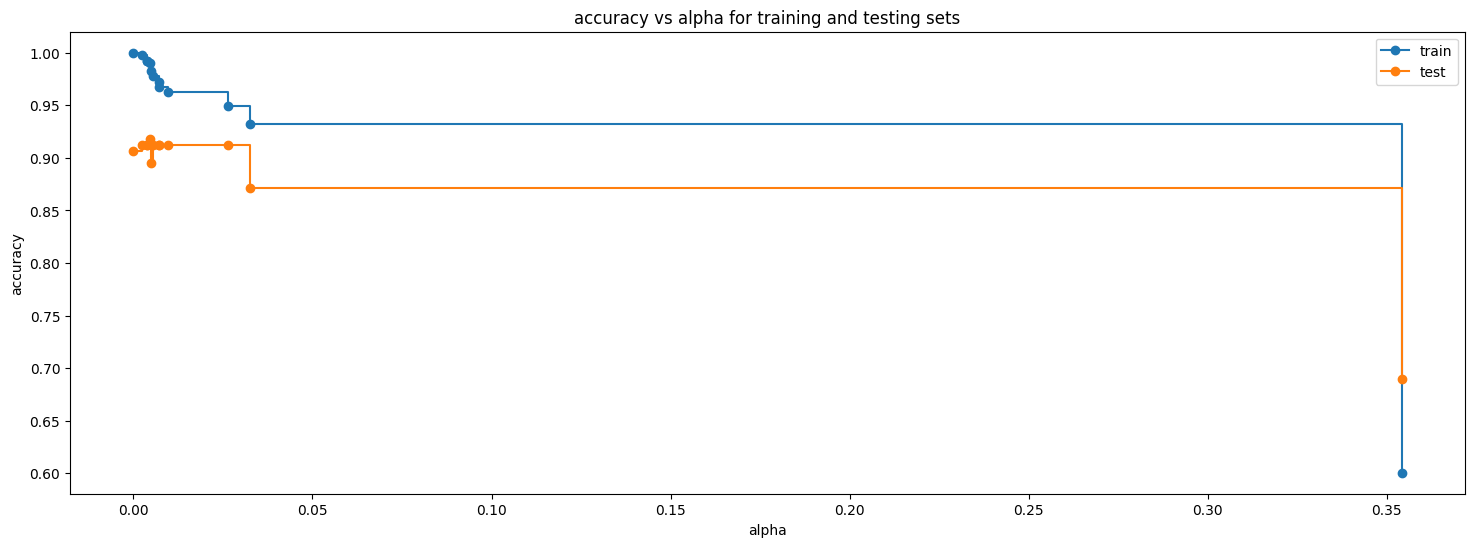

In [109]:
#calculate train and test accuracy of all models #
train_scores = [model.score(x_train,y_train) for model in models]
test_scores = [model.score(x_test,y_test) for model in models]
#plot training and testing accuracy#
fig ,ax = plt.subplots(figsize =(18,6))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores,marker = 'o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores,marker = 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [112]:
# at 0.02 the ccp_alpha is obtained#
model = DecisionTreeClassifier(random_state = 0,ccp_alpha = 0.03)
model.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)

In [113]:
from sklearn.metrics import accuracy_score
model2_predict = model2.predict(x_test)
accuracy_score(y_test,model2_predict)

0.9298245614035088